### Check the hard recognable tiles visually.



In [1]:
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.transform_xy import geo2imagexy
from glob import glob


/home/xin/miniconda3/envs/venv-tibetwater/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
path_vector = config.root_proj + '/data/tibet/tibet_tiles_vec/tibet_tiles.gpkg'
tiles_gdf = gpd.read_file(path_vector)
tiles_gdf.head()


,area,proj,tile_id,geometry
0,10852.910371,EPSG: 32646,001,"MULTIPOLYGON (((91.60292 25.97742, 91.60292 26..."
1,10856.066053,EPSG: 32646,002,"MULTIPOLYGON (((92.59904 25.97742, 92.59904 26..."
2,10853.222782,EPSG: 32647,003,"MULTIPOLYGON (((97.64819 25.97742, 97.64819 26..."
3,10856.025776,EPSG: 32647,004,"MULTIPOLYGON (((98.64468 25.97742, 98.64468 26..."
4,10850.995157,EPSG: 32647,005,"MULTIPOLYGON (((99.64905 25.97742, 99.64905 26..."


### **Check the prediction water map**

In [5]:
paths_wat = glob(config.root_tb_data+'/tibet-tiles-check/*.tif')

# ### check one tile
# month_id, tile_id = '202008', '236'
# path_s1as_img = config.root_tb_data + '/tibet-'+month_id+'/s1-ascend/tibet_s1as_'+month_id+'_tile_'+tile_id+'.tif'
# path_wat = config.root_tb_data +'/tibet-tiles-check'+'/tibet_s1_'+month_id+'_tile_'+tile_id+'_water.tif'

### check all tiles
for path_wat in paths_wat:
  print(path_wat)
  month_id, tile_id = path_wat[-25:-19], path_wat[-13:-10]
  path_s1as_img = config.root_tb_data + '/tibet-'+month_id+'/s1-ascend/tibet_s1as_'+month_id+'_tile_'+tile_id+'.tif'
  ## -- 1.data read
  s1_img_tile, s1_img_tile_info = readTiff(path_in = path_s1as_img)
  s1_tile_wat, s1_tile_wat_info = readTiff(path_in = path_wat)
  ## -- 2.data visualization
  plt.figure(figsize=(12, 6))
  ## plot s1 image
  plt.subplot(1,2,1)
  imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2)
  # outline
  idx, = np.where(tiles_gdf['tile_id'].values == tile_id)
  tile_region = tiles_gdf.loc[int(idx)]['geometry'].bounds
  outline_lon = [tile_region[0], tile_region[2], tile_region[2], tile_region[0], tile_region[0]]
  outline_lat = [tile_region[1], tile_region[1], tile_region[3], tile_region[3], tile_region[1]]
  outline_row, outline_col = geo2imagexy(x=np.array(outline_lon), \
                          y=np.array(outline_lat), gdal_trans=s1_img_tile_info['geotrans'])
  plt.plot(outline_col, outline_row, color='g', linewidth=2)
  plt.title('s2as_'+month_id + '_' + tile_id)
  ## plot water map
  plt.subplot(1,2,2)
  imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2)
  plt.plot(outline_col, outline_row, color='g', linewidth=2)
  plt.title('result_'+month_id + '_' + tile_id)
  plt.savefig(config.root_proj+'/figure/check_tiles_base/'+month_id+'_'+tile_id+'.png', bbox_inches='tight')



/WD-myBook/tibet-water/tibet-tiles-check/tibet_s1_202008_tile_218_water.tif
/WD-myBook/tibet-water/tibet-tiles-check/tibet_s1_202008_tile_219_water.tif
/WD-myBook/tibet-water/tibet-tiles-check/tibet_s1_202008_tile_236_water.tif
/WD-myBook/tibet-water/tibet-tiles-check/tibet_s1_202008_tile_239_water.tif


KeyboardInterrupt: 

### Zoom in visualization

Text(0.5, 1.0, 'result')

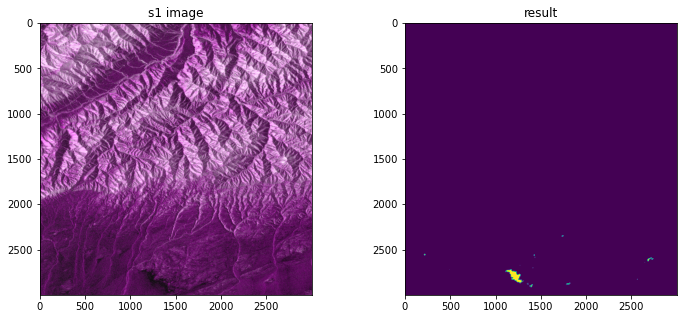

In [ ]:
plt.figure(figsize=(12,5))
# region = [6000,8000, 11000, 13000]
# region = [0, 2000, 9000, 12000]
# region = [6000,11000,0,4000]
region = [4000,7000,11000,14000]
plt.subplot(1,2,1)
imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2, focus_pix=region)
plt.title('s1 image')
## plot water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2, focus_pix=region)
plt.title('result')

